# Project2: 뉴스 카테고리 분류
-이번 아이펠 과제는 다른 분들의 코드를 많이 참조했습니다.

In [1]:
# 필요한 library들을 import한다.
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## 1. Data Preprocessing

In [2]:
# 해당 데이터셋은 이미 각 단어를 그 단어의 빈도수로 인코딩되어 있다.
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000,  # 1~10000번째로 높은 빈도수의 단어만 사용 (데이터셋 특성)
                                                         test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
num_classes = max(y_train) + 1 # y_train은 label로 되어 있기 때문에 +1을 해야 된다.
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


In [8]:
# map 함수 연습
a = [[10, 20, 30], [20, 30, 50], [20, 40]]
b = sum(map(sum,a))
b

220

(array([1., 1., 2., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

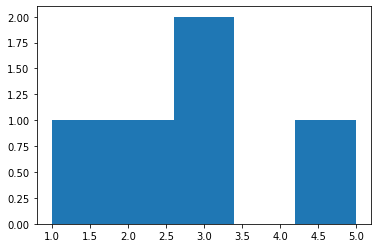

In [9]:
# histogram 연습
a = [[10, 20, 30], [20, 30, 50], [20, 40], [20], [30, 50, 60, 10, 100]]
plt.hist([len(s) for s in a], bins = 5)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


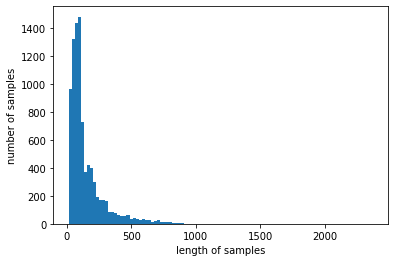

In [10]:
# 데이터 분포 확인

print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))
# map을 사용하면 각 요소에 len을 하나씩 수행하게 된다.

plt.hist([len(s) for s in x_train], bins=100) # histogram을 그릴수 있다.
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

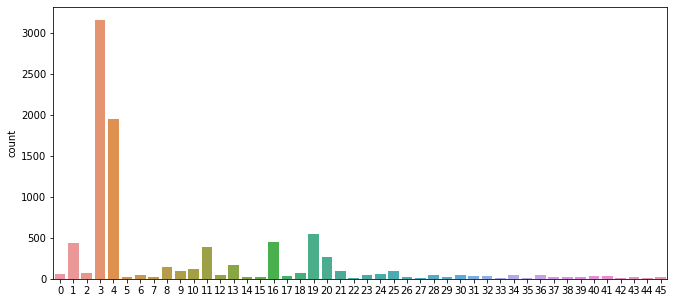

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [11]:
# 분류 클래스 분포 확인

fig, axe = plt.subplots(ncols=1) # ncols을 2로 하면 열 방향으로 2개가 된다.
fig.set_size_inches(11,5) # 11 * 5 size가 된다.
sns.countplot(x=y_train) # 숫자를 세는 것이다
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
# False로 하면 return을 하지 않는다.
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# elements과 숫자를 출력한다.

## 2. Word to Index and Index to Word

In [12]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# 사전에 정의된 word to index를 repository에서 다운로드를 받는다.

565248/550378 [==============================] - 0s 0us/step


In [13]:
word_index['the'] 

1

In [14]:
index_to_word = { index+3 : word for word, index in word_index.items() }
# special token들에 대한 indexing을 하기 위하여 0, 1, 2를 확보한다.
# indexing to word를 하는 것이다.

In [15]:
index_to_word

{10999: 'mdbl',
 16263: 'fawc',
 12092: 'degussa',
 8806: 'woods',
 13799: 'hanging',
 20675: 'localized',
 20676: 'sation',
 20678: 'chanthaburi',
 11000: 'refunding',
 8807: 'hermann',
 20679: 'passsengers',
 20680: 'stipulate',
 8355: 'heublein',
 20716: 'screaming',
 16264: 'tcby',
 188: 'four',
 1645: 'grains',
 20683: 'broiler',
 12093: 'wooden',
 1223: 'wednesday',
 13800: 'highveld',
 7596: 'duffour',
 20684: '0053',
 3917: 'elections',
 2566: '270',
 3554: '271',
 5116: '272',
 3555: '273',
 3403: '274',
 7978: 'rudman',
 3404: '276',
 3481: '277',
 3635: '278',
 4312: '279',
 9384: 'dormancy',
 7250: 'errors',
 3089: 'deferred',
 20686: 'sptnd',
 8808: 'cooking',
 20687: 'stratabit',
 16265: 'designing',
 20688: 'metalurgicos',
 13801: 'databank',
 20689: '300er',
 20690: 'shocks',
 7975: 'nawg',
 20691: 'tnta',
 20692: 'perforations',
 2894: 'affiliates',
 20693: '27p',
 16266: 'ching',
 598: 'china',
 16267: 'wagyu',
 3192: 'affiliated',
 16268: 'chino',
 16269: 'chinh',
 2

In [16]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [17]:
index_to_word[4]

'the'

In [18]:
# 디코딩 함수
# 구체적인 것보다는 decoding을 수행하는 함수라는 것을 알아두자!
# 즉 index를 가지고 원래 단어를 출력하는 것이다.
def get_org_txt(words_idx: list):
    return ' '.join([index_to_word[idx] for idx in words_idx])

In [19]:
# 문장을 보면 앞의 1, 2, 2는 sos unk unk로 변환이 된 것을 확인할 수 있다.
print(get_org_txt(x_train[0]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [20]:
# 텍스트 데이터로 디코딩
decoded = []
for i in range(len(x_train)):
    t = get_org_txt(x_train[i])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [21]:
#test데이터도 변환
decoded = []
for i in range(len(x_test)):
    t = get_org_txt(x_test[i])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [22]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [23]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

## 3. Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
dtmvector = CountVectorizer()
# CountVectorizer를 이용해서 vectorization을 수행한다.
# 즉 DTM으로 Matrix처럼 만든 것이다.
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [26]:
tfidf_transformer = TfidfTransformer()
# tf-idf를 활용하여 Vectorization을 수행한 것이다.
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


## 4. Machine Learning Model 사용하기

### 4.1 Naive Bayes Classifier(Multinomial)

In [27]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [28]:
model = MultinomialNB() # sikit learn 라이브러리를 가져온다.
model.fit(tfidfv, y_train) # model.fit()을 통하여 model을 학습을 시킨다.

MultinomialNB()

In [29]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [30]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [31]:
y_test[3]


4

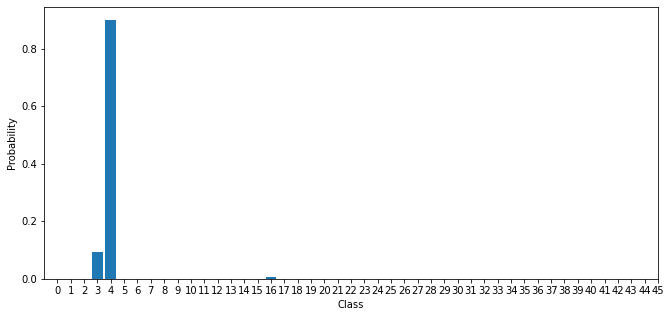

In [32]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
# Classification Report를 해주는 library를 활용했다
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0) # 각각의 행들을 비교하며 label들이 올바르게 분류가 됐는지를 평가한다.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [35]:
# Heat Map을 그려주는 함수이다. 그렇게만 이해하고 넘어가자!
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

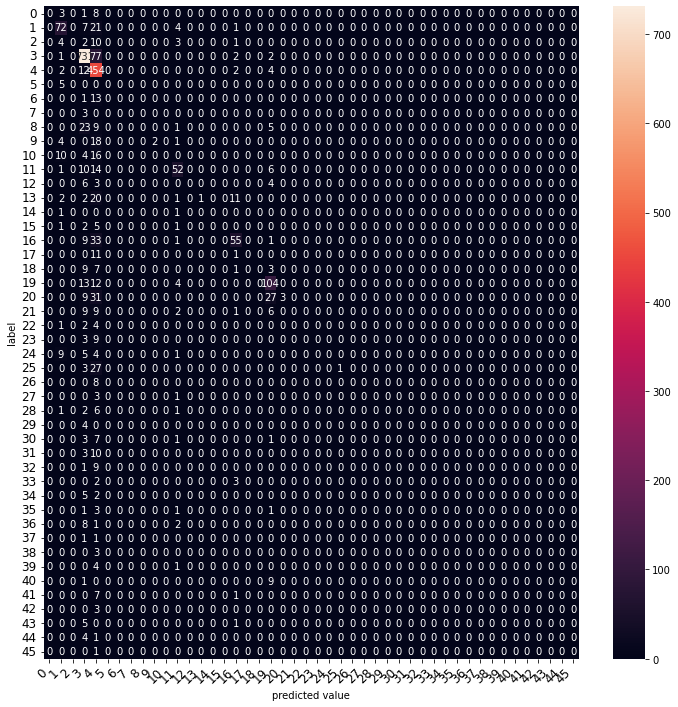

In [36]:
graph_confusion_matrix(model, tfidfv_test, y_test)


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

### 4.2 Logistic Regression

In [38]:
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [39]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8103294746215495


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.78      0.76       105
           2       0.70      0.70      0.70        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.67      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.65      0.59      0.62        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.77      0.74        99
          17       0.80    

### 4.3 Linear Support Vector Machine

In [41]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [42]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
#예측값과 실제값 비교해보세요

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7845057880676759


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.72      0.75       105
           2       0.65      0.65      0.65        20
           3       0.91      0.92      0.91       813
           4       0.79      0.85      0.82       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.65      0.68      0.67        38
           9       0.71      0.88      0.79        25
          10       0.92      0.73      0.81        30
          11       0.63      0.73      0.68        83
          12       0.46      0.46      0.46        13
          13       0.62      0.57      0.59        37
          14       1.00      1.00      1.00         2
          15       0.43      0.33      0.38         9
          16       0.68      0.74      0.71        99
          17       1.00    

### 4.4 Decision Tree

In [44]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [45]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.42      0.53       105
           2       0.62      0.50      0.56        20
           3       0.93      0.83      0.88       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.85      0.77      0.81        30
          11       0.64      0.51      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.84      0.69        99
          17       0.00    

### 4.5 Random Forest

In [47]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [48]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

### 4.6 Gradient Boosting Tree

In [50]:
# 15분 정도 소요
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.68      0.72       105
           2       0.78      0.70      0.74        20
           3       0.88      0.91      0.89       813
           4       0.76      0.83      0.79       474
           5       0.50      0.20      0.29         5
           6       0.80      0.86      0.83        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.74      0.80      0.77        25
          10       0.90      0.87      0.88        30
          11       0.62      0.64      0.63        83
          12       0.33      0.46      0.39        13
          13       0.62      0.49      0.55        37
          14       0.14      0.50      0.22         2
          15       0.38      0.33      0.35         9
          16       0.73      0.73      0.73        99
          17       0.27    

### 4.7 Voting

In [53]:
# 20분 이상 소요될 수 있습니다.
# Voting을 구현해보세요. (Voing은 'soft'로 설정)
# 조건1 : 로지스틱회귀를 사용해주세요(패널티는 'L2'로 설정)
#조건 2: Complement Naive Bayes Classifier를 사용해주세요
#조건 3: GradientBoosting Classifier를 사용해주세요
# 참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

#[[YOUR CODE]]
voting_classifier = VotingClassifier(estimators=[
                                        ('lr', LogisticRegression(C=10000, penalty='l2')),
                                        ('cb', ComplementNB()),
                                        ('grbt', GradientBoostingClassifier(random_state=0))
                                     ],
                                     voting='soft',
                                     n_jobs=-1)  # n_jobs가 `-1`이면 병렬 처리 가능

voting_classifier.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [54]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8116651825467498


In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.77      0.74      0.76       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.83      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.65      0.69      0.67        83
          12       0.46      0.46      0.46        13
          13       0.68      0.62      0.65        37
          14       0.14      0.50      0.22         2
          15       0.57      0.44      0.50         9
          16       0.72      0.75      0.73        99
          17       0.53    

## 5. 딥러닝 모델

### 5.1 LSTM
- 5000개만 활용하여서 LSTM 모델을 돌린다.

In [56]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 1. 데이터 전처리 함수
def preprocess_data(num_words=5000, maxlen=100):

    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    # 시퀀스의 길이를 맞추기 위한 패딩
    # padding을 하는 방법은 post와 pre 두가지가 있다.
    # 딥러닝 모델에 넣어야 되기 때문에 maxlen으로 맞추어야 된다.
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    
    # 원-핫 인코딩
    # 원-핫 인코딩을 수행한다.
    num_classes = np.max(y_train) + 1  # 클래스 개수 (0부터 시작하므로 +1)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test, num_classes

# 2. LSTM 모델 생성 함수
def build_lstm_model(vocab_size, maxlen, num_classes):

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
    
    # 첫 번째 LSTM 레이어 (드롭아웃 추가)
    model.add(LSTM(128, return_sequences=True))  # return_sequences=True: 시퀀스를 다음 LSTM 레이어로 전달
    model.add(Dropout(0.5))  # 과적합 방지를 위한 드롭아웃
    
    # 두 번째 LSTM 레이어 (마지막 시퀀스만 출력)
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# 3. 모델 학습 함수
def train_model(model, x_train, y_train, batch_size=64, epochs=50, validation_split=0.2):

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    return history

# 4. 모델 평가 함수
def evaluate_model(model, x_test, y_test):

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    print(f"Accuracy on Test Data: {accuracy:.4f}")
    
    return accuracy

# 5. 전체 실행 함수
def run_lstm_pipeline(num_words=5000, maxlen=100, epochs=50):

    # 데이터 전처리
    x_train, y_train, x_test, y_test, num_classes = preprocess_data(num_words=num_words, maxlen=maxlen)
    
    # 모델 생성
    model = build_lstm_model(vocab_size=num_words, maxlen=maxlen, num_classes=num_classes)
    
    # 모델 학습
    train_model(model, x_train, y_train, epochs=epochs)
    
    # 모델 평가
    evaluate_model(model, x_test, y_test)

# 6. LSTM 파이프라인 실행
run_lstm_pipeline(num_words=5000, maxlen=100, epochs=50)

Epoch 1/50
113/113 [==============================] - 63s 512ms/step - loss: 2.6863 - accuracy: 0.3350 - val_loss: 2.1975 - val_accuracy: 0.4374
Epoch 2/50
113/113 [==============================] - 56s 495ms/step - loss: 2.0770 - accuracy: 0.4532 - val_loss: 1.7867 - val_accuracy: 0.5214
Epoch 3/50
113/113 [==============================] - 56s 495ms/step - loss: 1.7619 - accuracy: 0.5467 - val_loss: 1.6895 - val_accuracy: 0.5620
Epoch 4/50
113/113 [==============================] - 56s 498ms/step - loss: 1.6289 - accuracy: 0.5741 - val_loss: 1.6256 - val_accuracy: 0.5782
Epoch 5/50
113/113 [==============================] - 56s 497ms/step - loss: 1.5129 - accuracy: 0.6075 - val_loss: 1.6104 - val_accuracy: 0.5698
Epoch 6/50
113/113 [==============================] - 56s 497ms/step - loss: 1.4061 - accuracy: 0.6337 - val_loss: 1.5434 - val_accuracy: 0.6032
Epoch 7/50
113/113 [==============================] - 57s 504ms/step - loss: 1.3036 - accuracy: 0.6568 - val_loss: 1.5084 - val_ac

### 5.2 RNN

In [57]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 1. 데이터 전처리 함수
def preprocess_data(num_words=5000, maxlen=100):
    
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    
    # 시퀀스의 길이를 맞추기 위한 패딩
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    
    # 원-핫 인코딩
    num_classes = np.max(y_train) + 1  # 클래스 개수 (0부터 시작하므로 +1)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test, num_classes

# 2. 모델 생성 함수
def build_rnn_model(vocab_size, maxlen, num_classes):

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))  # 임베딩 레이어
    model.add(SimpleRNN(128))  # RNN 레이어
    model.add(Dense(num_classes, activation='softmax'))  # 출력 레이어 (다중 클래스 분류)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# 3. 모델 학습 함수
def train_model(model, x_train, y_train, batch_size=64, epochs=50, validation_split=0.2):

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    return history

# 4. 모델 평가 함수
def evaluate_model(model, x_test, y_test):

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test 정확도: {test_acc:.4f}")
    
    # 예측값 계산
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # 정확도 출력
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    print(f"정확도: {accuracy:.4f}")
    
    return accuracy

# 5. 전체 실행 함수(파이프라인 정의)
def run_rnn_pipeline(num_words=5000, maxlen=100, epochs=50):

    # 데이터 전처리
    x_train, y_train, x_test, y_test, num_classes = preprocess_data(num_words=num_words, maxlen=maxlen)
    
    # 모델 생성
    model = build_rnn_model(vocab_size=num_words, maxlen=maxlen, num_classes=num_classes)
    
    # 모델 학습
    train_model(model, x_train, y_train, epochs=epochs)
    
    # 모델 평가
    evaluate_model(model, x_test, y_test)

# 6. RNN 파이프라인 실행
run_rnn_pipeline(num_words=5000, maxlen=100, epochs=50)

Epoch 1/50
113/113 [==============================] - 11s 90ms/step - loss: 2.4494 - accuracy: 0.3598 - val_loss: 2.2308 - val_accuracy: 0.4057
Epoch 2/50
113/113 [==============================] - 10s 88ms/step - loss: 2.0673 - accuracy: 0.4637 - val_loss: 2.1317 - val_accuracy: 0.4329
Epoch 3/50
113/113 [==============================] - 10s 87ms/step - loss: 1.6521 - accuracy: 0.5787 - val_loss: 1.9225 - val_accuracy: 0.4697
Epoch 4/50
113/113 [==============================] - 10s 88ms/step - loss: 1.2558 - accuracy: 0.6867 - val_loss: 2.1009 - val_accuracy: 0.4541
Epoch 5/50
113/113 [==============================] - 10s 92ms/step - loss: 0.9120 - accuracy: 0.7815 - val_loss: 2.2414 - val_accuracy: 0.4630
Epoch 6/50
113/113 [==============================] - 10s 90ms/step - loss: 0.6486 - accuracy: 0.8554 - val_loss: 2.2439 - val_accuracy: 0.4786
Epoch 7/50
113/113 [==============================] - 10s 87ms/step - loss: 0.4589 - accuracy: 0.9034 - val_loss: 2.3707 - val_accuracy:

## 5.3 Transformer

## Appendix

### A. Bag of Words

### B. DTM

### C. Naive Bayes Classifier
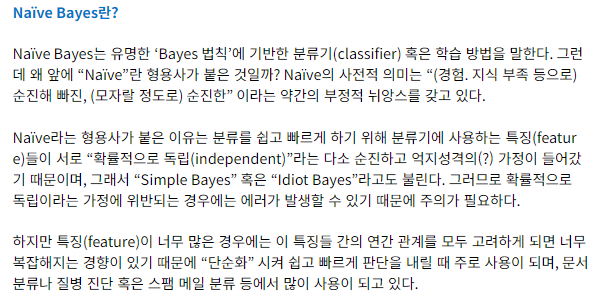

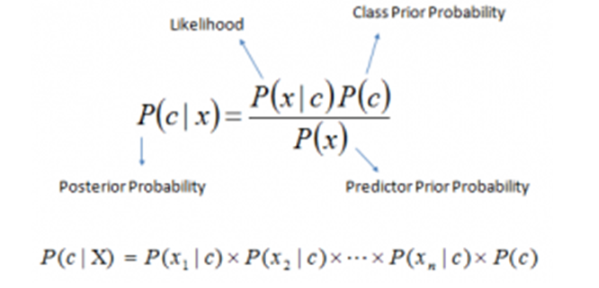

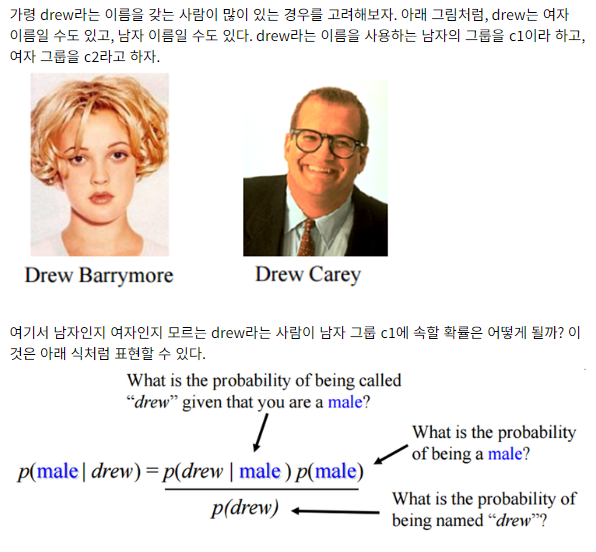

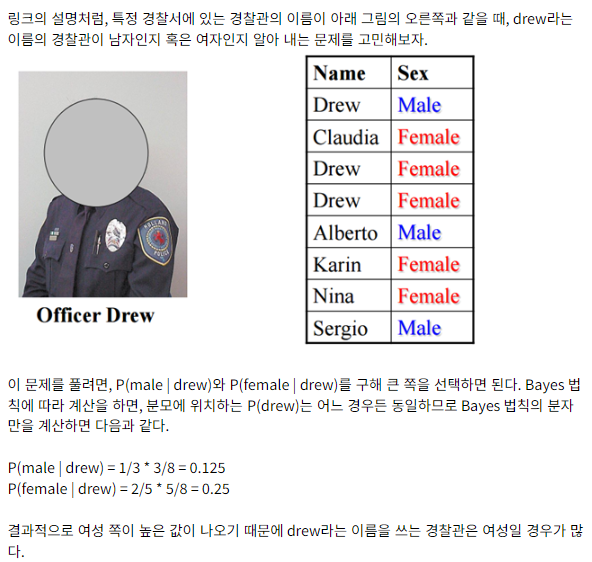